In [24]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import camb
import curvedsky as cs

In [2]:
import sys
sys.path.append('../../')

In [3]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import LATsky, Mask
from cobi.quest import FilterEB, QE
from cobi.sht import HealpixDUCC

In [ ]:
dir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v1'
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
alpha_err = 0.1
latsky1 = LATsky(dir, nside=1024, cb_model='aniso',Acb=4.0e-6, AEcb=-1.0e-3,lensing=False,alpha=alpha,alpha_err=alpha_err,nsplits=1)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1


In [ ]:
mask1 = Mask(latsky1.basedir, latsky1.nside,'LATxGAL', 2, gal_cut=0.8)

Mask : INFO - The given galactic cut value seems in fsky and it corresponds to 80.0% of sky


Mask : INFO - The given galactic cut value seems in fsky and it corresponds to 80.0% of sky
Mask : INFO - The given galactic cut value seems in fsky and it corresponds to 80.0% of sky


In [ ]:
filt1 = FilterEB(latsky1, mask1, lmax=3000, sht_backend='d')

In [ ]:
qe1 = QE(filt1,100,3000,2048)


Computing OCL:   0%|          | 0/100 [00:00<?, ?it/s]

In [43]:
qcl = []
for i in tqdm(range(200)):
    qcl.append(qe1.qcl(i))
qcl = np.array(qcl)

100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


In [47]:
qe1.cl_aa

array([2.51327412e+25, 1.25663706e-05, 4.18879020e-06, ...,
       6.00089997e-12, 5.99503972e-12, 5.98918804e-12])

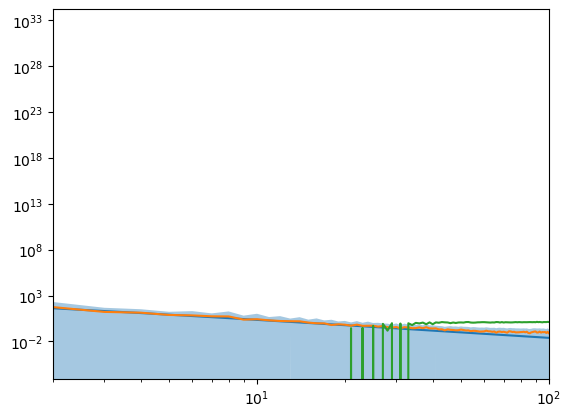

In [ ]:
plt.semilogx(qe1.cl_aa*1e7)
plt.semilogx(qcl.mean(axis=0)*1e7, label='QCL')
plt
plt.xlim(2,100)
plt.fill_between(np.arange(len(qcl[0])), qcl.mean(axis=0)*1e7 - qcl.std(axis=0)*1e7, qcl.mean(axis=0)*1e7 + qcl.std(axis=0)*1e7, alpha=0.4)
plt.loglog(qe1.RDN0(0)*1e7)
